In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

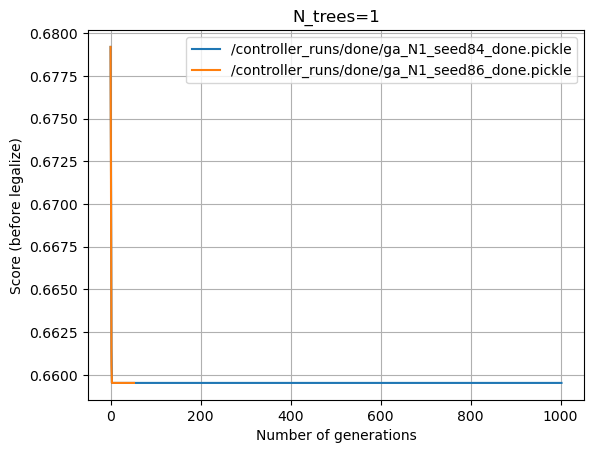

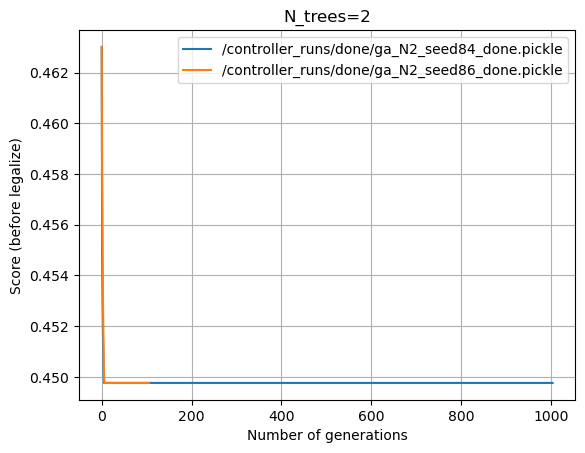

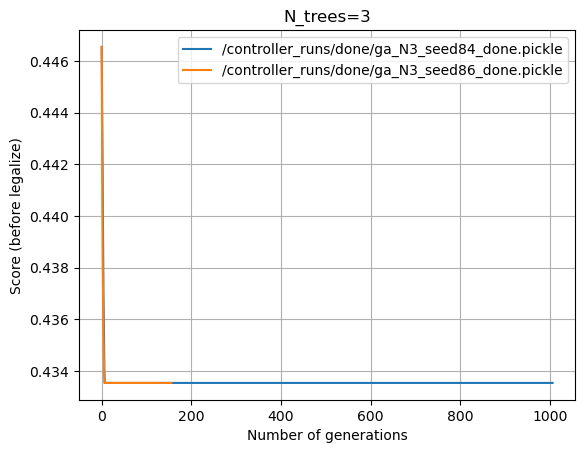

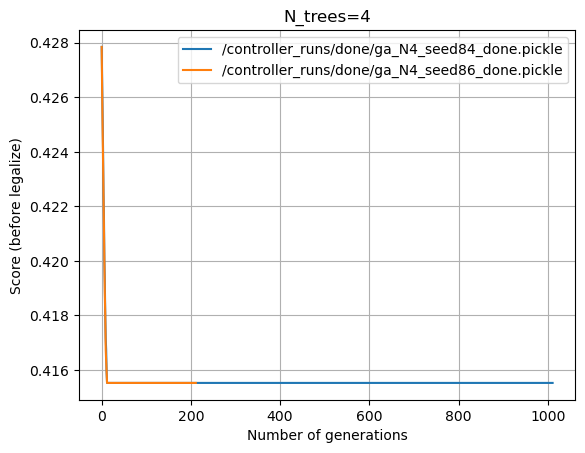

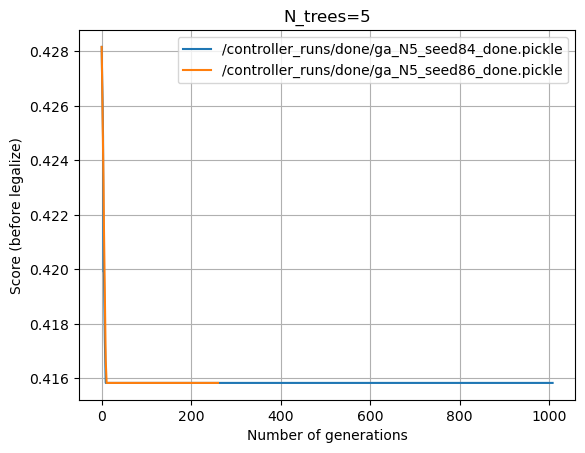

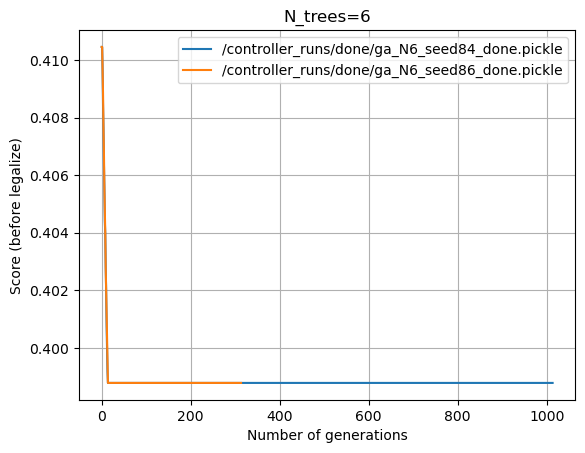

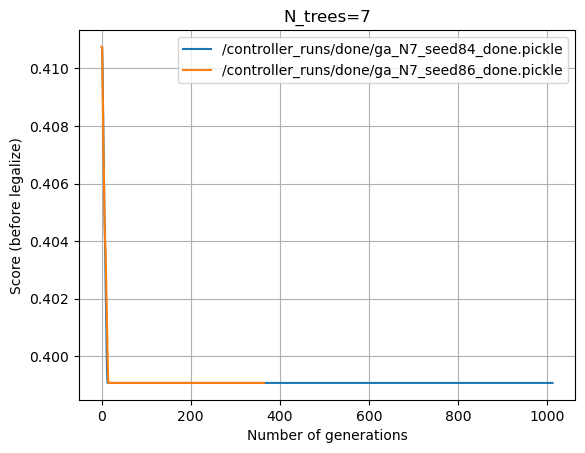

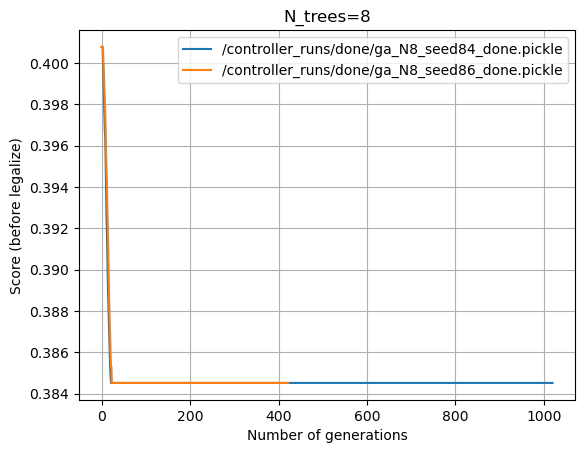

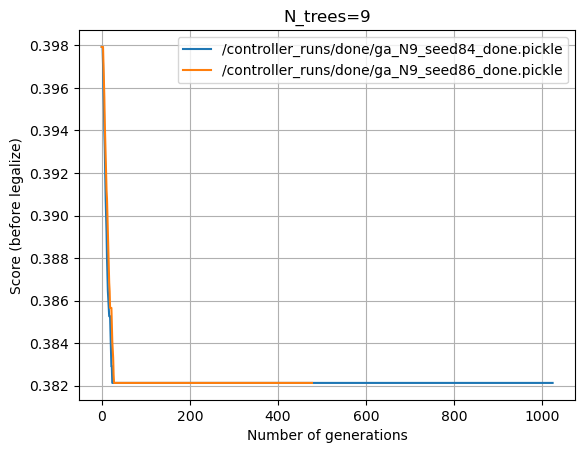

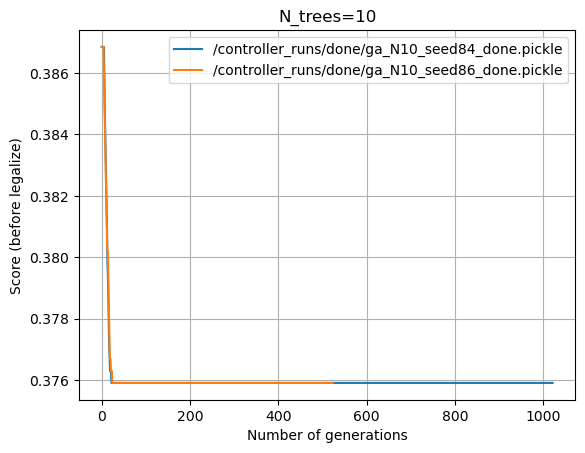

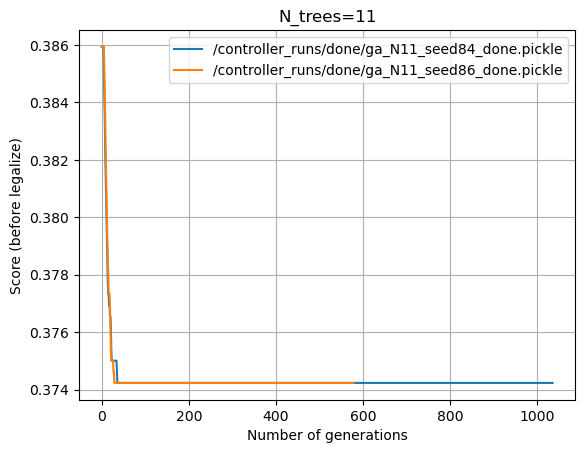

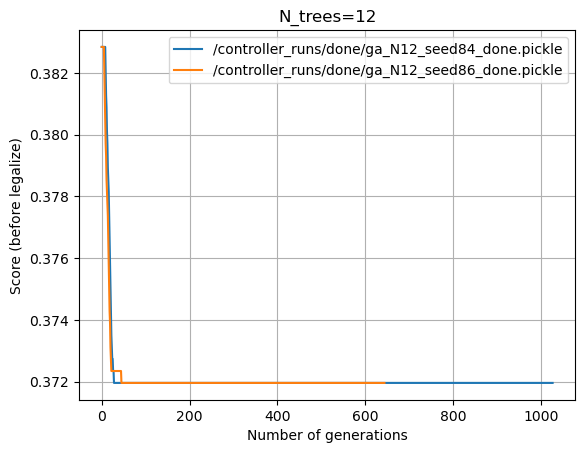

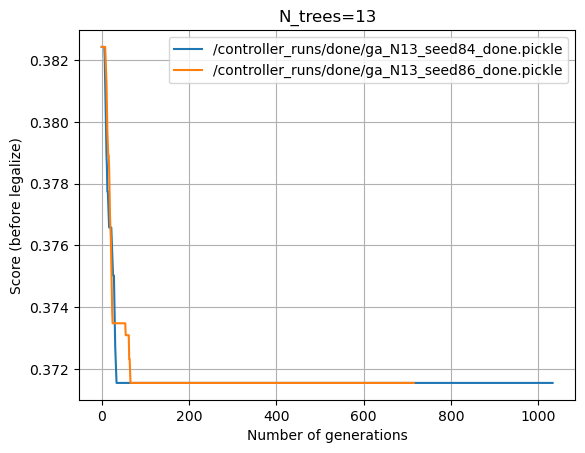

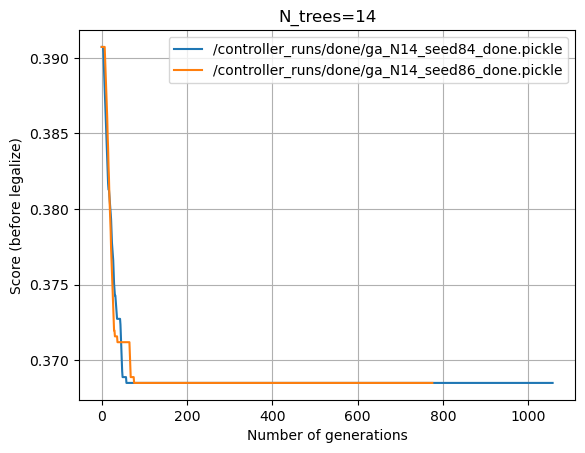

In [2]:
import numpy as np
import glob
for N_trees in np.arange(1,21):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>1:
        plt.figure()
        for f in files:
            dat = kgs.dill_load(f)
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f[20:])
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()

In [3]:
dat.ga.best_costs_per_generation

[[array([0.39071944, 0.56144685], dtype=float32),
  array([0.39071944, 0.00871274], dtype=float32),
  array([0.39071944, 0.00144136], dtype=float32),
  array([0.39071944, 0.00065634], dtype=float32),
  array([3.9071944e-01, 2.6167207e-04], dtype=float32),
  array([3.9071944e-01, 2.8890472e-05], dtype=float32),
  array([3.90719444e-01, 1.14618615e-05], dtype=float32),
  array([3.9071944e-01, 6.8685481e-06], dtype=float32),
  array([3.8992915e-01, 7.4786458e-06], dtype=float32),
  array([3.8913965e-01, 4.1345929e-06], dtype=float32),
  array([3.8835093e-01, 5.2262358e-06], dtype=float32),
  array([3.8756302e-01, 4.3037389e-06], dtype=float32),
  array([3.8677594e-01, 5.0517956e-06], dtype=float32),
  array([3.8598964e-01, 3.7714942e-06], dtype=float32),
  array([3.8481167e-01, 8.1699509e-06], dtype=float32),
  array([3.8402739e-01, 4.5143947e-06], dtype=float32),
  array([3.8285241e-01, 7.7845925e-06], dtype=float32),
  array([3.8207012e-01, 3.9991914e-06], dtype=float32),
  array([3.808